In [ ]:
!pip install plotly==4.10

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
!unzip archive.zip

In [ ]:
def process_data(city):
  df = pd.read_csv('station_'+city+'.csv')
  df.columns = df.columns.str.lower()
  df.drop(columns={'d-j-f','m-a-m','s-o-n','j-j-a','metann'},inplace=True)
  ## Usando o Melt
  df = df.melt(id_vars=['year'],value_vars=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
          var_name='month',value_name='temperature')
  df.year = df.year.astype(str)
  ## Usando o Apply
  df.year = df[['year', 'month']].apply(lambda x: ''.join(x), axis=1)
  df['date'] = df.year.apply(lambda x: datetime.strptime(x, '%Y%b'))
  df['city'] = city
  df.index = df.date
  df.sort_index(inplace=True)
  df.drop(columns=['year','month','date'],inplace=True)

  ## Tratar o Outlier
  df["temperature"] = df["temperature"].mask(df["temperature"] >50, np.median)
  return df

In [ ]:
df_belem      = process_data('belem')
df_curitiba   = process_data('curitiba')
df_fortaleza  = process_data('fortaleza')
df_goiania    = process_data('goiania')
df_macapa     = process_data('macapa')
df_manaus     = process_data('manaus')
df_recife     = process_data('recife')
df_rio        = process_data('rio')
df_salvador   = process_data('salvador')
df_sao_luiz   = process_data('sao_luiz')
df_sao_paulo  = process_data('sao_paulo')
df_vitoria    = process_data('vitoria')

In [ ]:
## Usando o Concat
df_all = pd.concat([df_belem,df_curitiba,df_rio,df_salvador,df_sao_luiz,df_sao_paulo,df_vitoria])

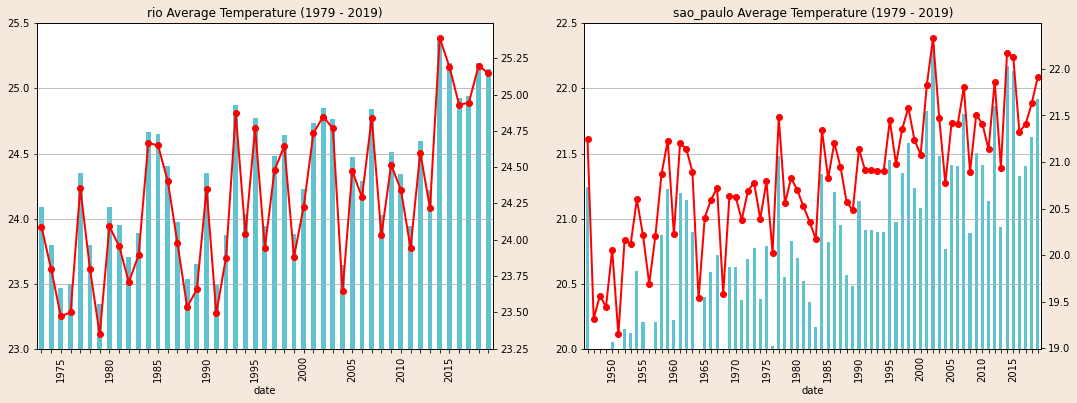

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')

for i, city in [(0,'rio'),(1,'sao_paulo')]:
  data_city = df_all[df_all.city == city]
  data = data_city.groupby(by=data_city.index.year).mean()
  data.plot(kind='bar', ax=ax[i], legend=False,color='#60c4d0')
  ax[i].set_xticklabels([i if i %5==0 else "" for i in data.index.unique() ])
  ax[i].yaxis.grid(True)
  ax_twinx = ax[i].twinx()
  ax_twinx.plot(ax[i].get_xticks(),data.values,linestyle='-', marker='o', linewidth=2.0, color='red')
  ax[i].title.set_text('%s Average Temperature (1979 - 2019)' % city)

ax[0].set_ylim(23,25.5)
ax[1].set_ylim(20,22.5)


plt.show()
